# Variance Baise Trade-off

- When the model is not learning any points its underfitting(High Baise)
- When the model is learning every point its overfitting (High Variance)

Known as Variance Baise Tradeoff

# Regularization:

It use control underfitting and overfitting 

### Types of Regularization.

1. Lasso # will drop column internally the under-fitting and over-fitting data by bringing down the coefficient
2. Ridge # will remove the difference of the coefficent by making a change in alpha[.001,.0001,.01,.1,1,10]
3. Elastic Net # combination of Lasso and Ridge ..... controled by alpha parameter

**NOTE- Noise Means Outliers**

In [1]:
# loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# scientific library for python
import scipy
from scipy.stats import zscore, percentileofscore, ttest_1samp, ttest_ind

# scikit learn for Machine Learning
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, roc_auc_score, roc_curve

# regularization library
from sklearn.linear_model import Lasso, Ridge, ElasticNet

# import warnings
import warnings
warnings.filterwarnings("ignore")

In [20]:
df=pd.read_csv(r"C:/Users/jitsa/Downloads/boston.csv")
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [21]:
type(df)

pandas.core.frame.DataFrame

In [22]:
df.rename(columns={'Unnamed: 0':'Sno'},inplace=True)

In [23]:
df.sample(5)

,Sno,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
242,242,0.10290,30.0,4.93,0.0,0.428,6.358,52.9,7.0355,6.0,300.0,16.6,372.75,11.22,22.2
374,374,18.49820,0.0,18.10,0.0,0.668,4.138,100.0,1.1370,24.0,666.0,20.2,396.90,37.97,13.8
129,129,0.88125,0.0,21.89,0.0,0.624,5.637,94.7,1.9799,4.0,437.0,21.2,396.90,18.34,14.3
392,392,11.57790,0.0,18.10,0.0,0.700,5.036,97.0,1.7700,24.0,666.0,20.2,396.90,25.68,9.7
327,327,0.24103,0.0,7.38,0.0,0.493,6.083,43.7,5.4159,5.0,287.0,19.6,396.90,12.79,22.2


In [24]:
print("Rows: ",df.shape[0],
      "\nColumns: ",df.shape[1],
      "\nSize: ",df.size,
      "\nDimension: ",df.ndim)

Rows:  506 
Columns:  15 
Size:  7590 
Dimension:  2


## Dataset information

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sno      506 non-null    int64  
 1   CRIM     506 non-null    float64
 2   ZN       506 non-null    float64
 3   INDUS    506 non-null    float64
 4   CHAS     506 non-null    float64
 5   NOX      506 non-null    float64
 6   RM       506 non-null    float64
 7   AGE      506 non-null    float64
 8   DIS      506 non-null    float64
 9   RAD      506 non-null    float64
 10  TAX      506 non-null    float64
 11  PTRATIO  506 non-null    float64
 12  B        506 non-null    float64
 13  LSTAT    506 non-null    float64
 14  Price    506 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 59.4 KB


## Null Values

In [26]:
# checking null values
df.isnull().sum().sum()

0

In [27]:
# checking not null values
df.notnull().sum()

Sno        506
CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
Price      506
dtype: int64

# Visualization

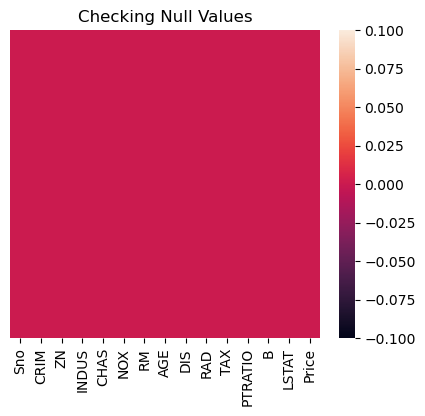

In [15]:
plt.figure(figsize=(5,4))
sns.heatmap(df.isnull(),yticklabels=False)
plt.title("Checking Null Values")
plt.show()

# Multivariate Graph

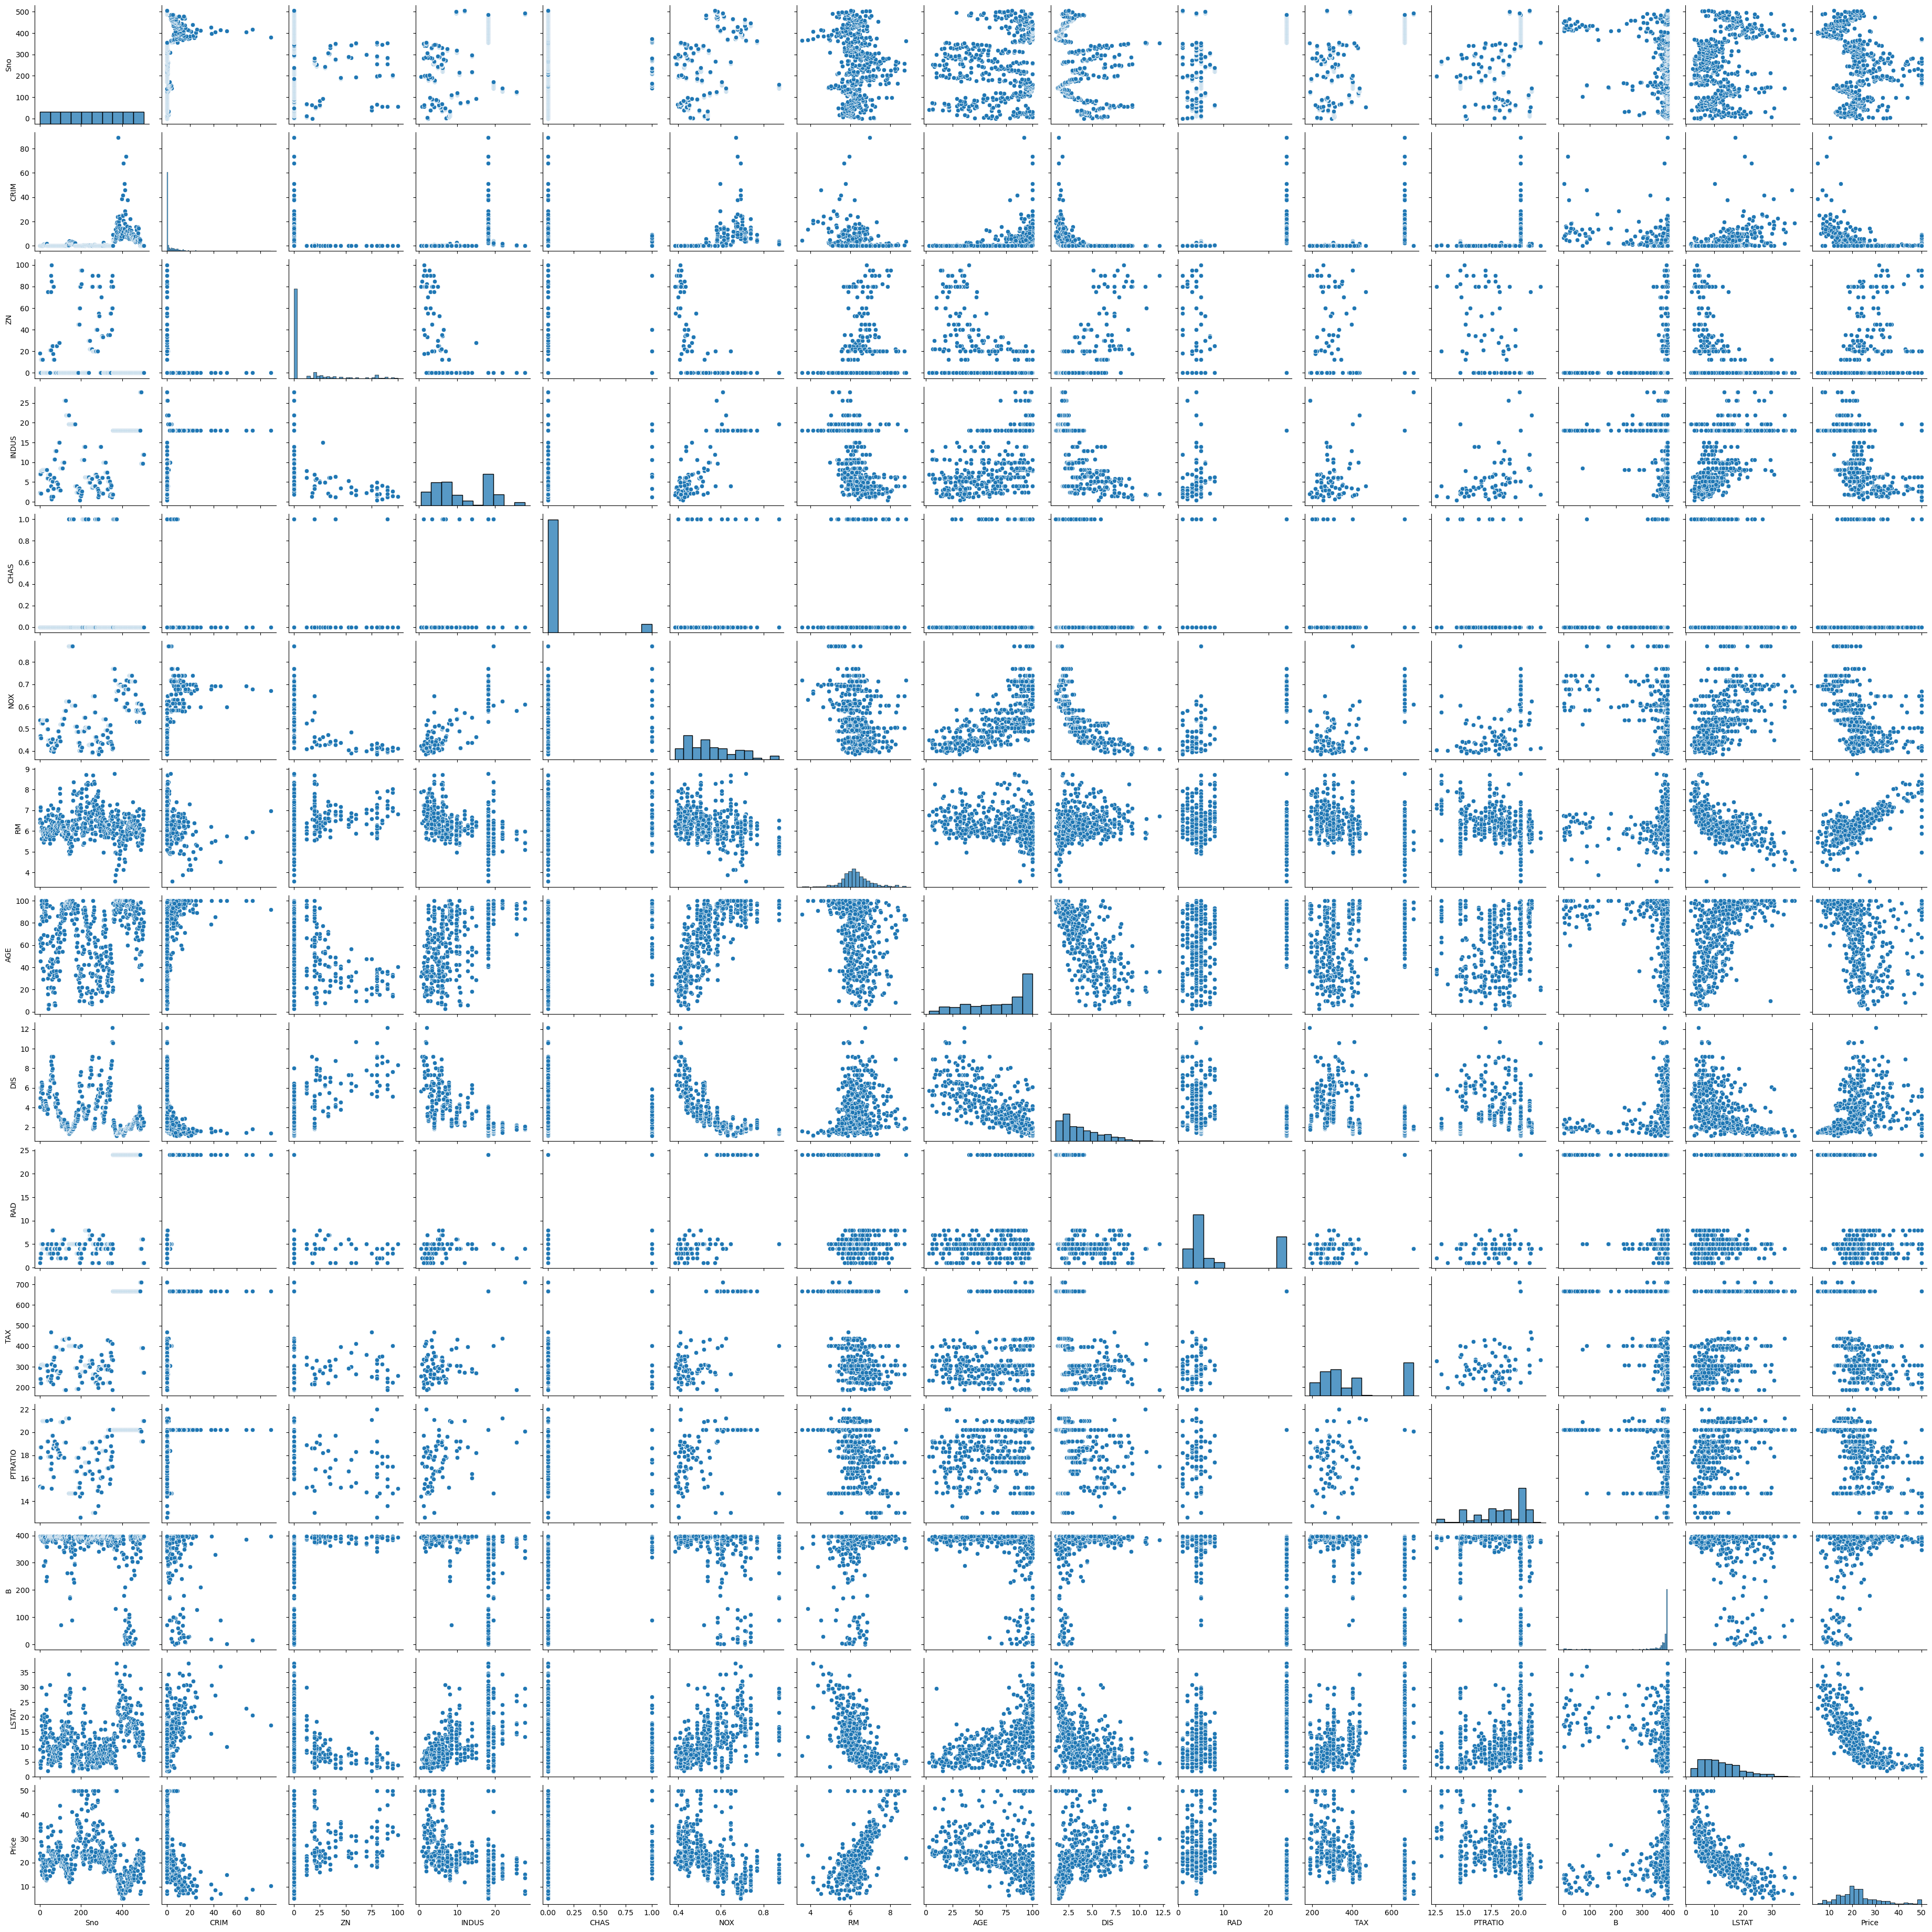

In [16]:
sns.pairplot(df)

In [28]:
df.drop("Sno",axis=1,inplace=True)

In [29]:
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [31]:
x=df.iloc[:,:-1]
x.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [37]:
y=df.loc[:,'Price']
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

# Train Test

In [60]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=20,random_state=47)

In [61]:
# checking shape
print("Training Shape\n---------------------------\n1.Train X {}\n2.Train Y {}\n".format(train_x.shape,train_y.shape))
print("Testing Shape\n-----------------------------\n1.Test X {}\n2.Test Y {}\n".format(test_x.shape,test_y.shape))

Training Shape
---------------------------
1.Train X (486, 13)
2.Train Y (486,)

Testing Shape
-----------------------------
1.Test X (20, 13)
2.Test Y (20,)



# Using Linear Regression

In [62]:
lm=LinearRegression()
lm.fit(train_x,train_y)

LinearRegression()

In [63]:
lm.score(train_x,train_y)

0.7392259063924806

In [64]:
pred_lm=lm.predict(test_x)

In [65]:
# checking using Metrics

print("r2_Score: ",r2_score(test_y,pred_lm))
print("\nMean Absolute Error :",mean_absolute_error(test_y,pred_lm))
print("\nMean Squared Error  :",mean_squared_error(test_y,pred_lm))

r2_Score:  0.7751198030165827

Mean Absolute Error : 3.082011803943174

Mean Squared Error  : 13.478666854614778


In [66]:
# checking coefficient

lm.coef_

array([-1.11057518e-01,  4.80959938e-02,  2.26935515e-02,  2.81979566e+00,
       -1.82372578e+01,  3.83634605e+00, -1.66222676e-03, -1.51025515e+00,
        3.21631194e-01, -1.23039182e-02, -9.89119777e-01,  9.80886748e-03,
       -5.18117600e-01])

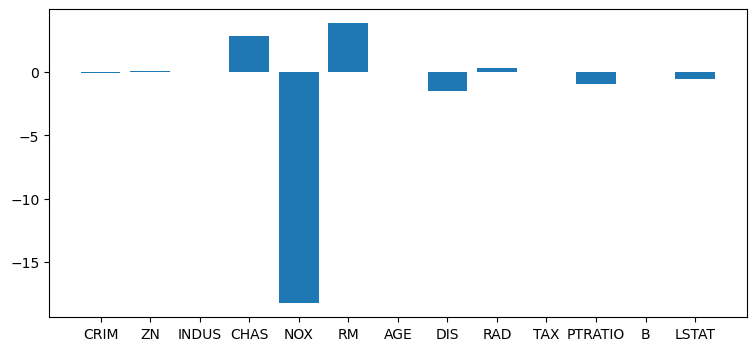

In [67]:
plt.figure(figsize=(9,4)) # width,height (rows_width,height_length)
plt.bar(x.columns,lm.coef_)
plt.show()

# Lasso

In [70]:
ls=Lasso(alpha=0.0001)
ls.fit(train_x,train_y)
ls.score(train_x,train_y)

0.7392259059641462

In [71]:
ls.coef_

array([-1.11055747e-01,  4.80966798e-02,  2.26786820e-02,  2.81961405e+00,
       -1.82338858e+01,  3.83635352e+00, -1.66474516e-03, -1.51020150e+00,
        3.21623742e-01, -1.23042357e-02, -9.89079829e-01,  9.80903995e-03,
       -5.18122277e-01])

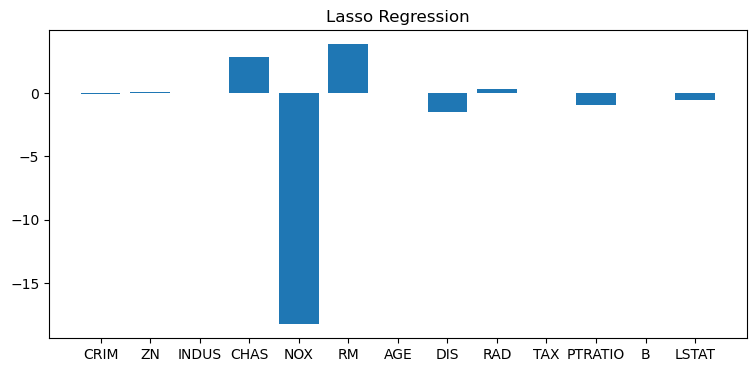

In [73]:
plt.figure(figsize=(9,4)) # width,height (rows_width,height_length)
plt.bar(train_x.columns,ls.coef_)
plt.title("Lasso Regression")
plt.show()

# Ridge

In [78]:
rd=Ridge(alpha=0.001)
rd.fit(train_x,train_y)
rd.score(train_x,train_y)

0.739225900980301

In [79]:
rd.coef_

array([-1.11051449e-01,  4.80985650e-02,  2.26389724e-02,  2.81960385e+00,
       -1.82249697e+01,  3.83645224e+00, -1.67319584e-03, -1.51007395e+00,
        3.21602675e-01, -1.23049842e-02, -9.88971236e-01,  9.80950607e-03,
       -5.18127497e-01])

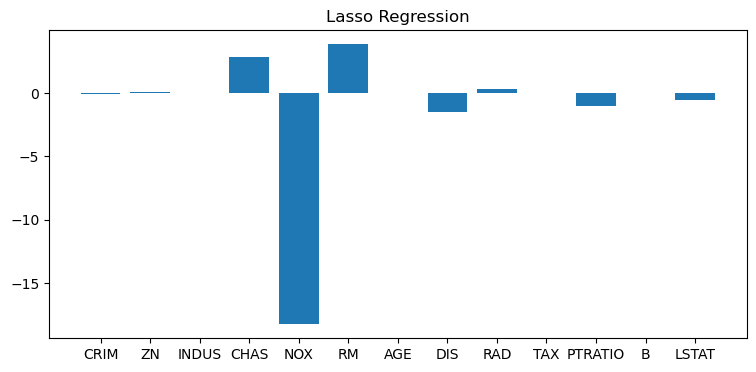

In [80]:
plt.figure(figsize=(9,4)) # width,height (rows_width,height_length)
plt.bar(train_x.columns,rd.coef_)
plt.title("Lasso Regression")
plt.show()

# ElasticNet

In [91]:
enr=ElasticNet(alpha=0.0000001)
enr.fit(train_x,train_y)
enr.score(train_x,train_y)*100

73.92259063889063

In [85]:
enr.coef_

array([-1.11055954e-01,  4.80966532e-02,  2.26795385e-02,  2.81973996e+00,
       -1.82341017e+01,  3.83637224e+00, -1.66501956e-03, -1.51020842e+00,
        3.21623888e-01, -1.23041932e-02, -9.89081666e-01,  9.80903136e-03,
       -5.18120240e-01])

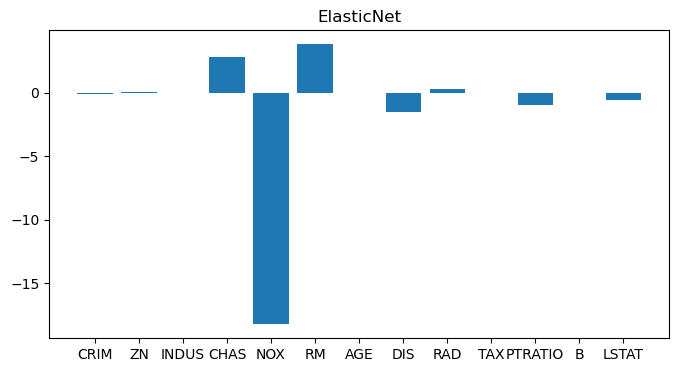

In [93]:
plt.figure(figsize=(8,4))
plt.bar(train_x.columns,enr.coef_)
plt.title("ElasticNet")
plt.show()

# Regression Models

- DecisionTreeRegressor
- Support Vector Regressor
- KNeighbors Regressor
- Support Vector Regressor


# classification Models

- DecisionTreeClassifier
- KNeighborsClassifier
- SVC
- GaussianNB, MultinomialNB,

## SVR(Support Vector Regressor)

In [96]:
from sklearn.svm import SVR

kernal_list=['linear','poly','rbf']

# changing the kernal value in loop
for i in kernal_list:
    svr=SVR(kernel=i)
    svr.fit(train_x,train_y)
    print("SVR-\
    Kernal=",i,"\nTraining Score: ",svr.score(train_x,train_y))
    # predict result
    pred_svr=svr.predict(test_x)
    # result
    print("R2-Score",r2_score(test_y,pred_svr),"\nMSE:",mean_squared_error(test_y,pred_svr),"\nMAE: ",mean_absolute_error(test_y,pred_svr),"\n\n")


SVR-    Kernal= linear 
Training Score:  0.7018432305867541
R2-Score 0.7633033836112217 
MSE: 14.186908766155842 
MAE:  2.681237943680117 


SVR-    Kernal= poly 
Training Score:  0.20418216178106374
R2-Score 0.0689663323306624 
MSE: 55.803458042463845 
MAE:  6.1054439405702725 


SVR-    Kernal= rbf 
Training Score:  0.2100433531787217
R2-Score 0.025976245111108076 
MSE: 58.38015919915099 
MAE:  6.135478912582989 




## KNeighbors Regressor

In [97]:
from sklearn.neighbors import KNeighborsRegressor

algo=['auto', 'ball_tree', 'kd_tree', 'brute']

for i in algo:
    knr=KNeighborsRegressor(algorithm=i)
    knr.fit(train_x,train_y)
    print("KNeighbors Algorithm: ",i)
    print("Training Score",knr.score(train_x,train_y))
    pred_test=knr.predict(test_x)
    print("R2_Score",r2_score(test_y,pred_test))
    print("MSE",mean_squared_error(test_y,pred_test))
    print("MAE",mean_absolute_error(test_y,pred_test),"\n\n")

KNeighbors Algorithm:  auto
Training Score 0.7109049096928436
R2_Score 0.43792041990686903
MSE 33.68942
MAE 4.906999999999998 


KNeighbors Algorithm:  ball_tree
Training Score 0.7109049096928436
R2_Score 0.43792041990686903
MSE 33.68942
MAE 4.906999999999998 


KNeighbors Algorithm:  kd_tree
Training Score 0.7109049096928436
R2_Score 0.43792041990686903
MSE 33.68942
MAE 4.906999999999998 


KNeighbors Algorithm:  brute
Training Score 0.7109049096928436
R2_Score 0.43792041990686903
MSE 33.68942
MAE 4.906999999999998 


